# Problem Statement
**In a competitive market like the restaurant industry, understanding the
factors that influence business success is crucial for stakeholders.
Utilizing the Yelp dataset, this project aims to investigate the relationship
between user engagement (reviews, tips, and check-ins) and business
success metrics (review count, ratings) for restaurants.**

# Research Objectives
1. **Quantify the correlation
between user engagement
(reviews, tips, check-ins) and
review count/average star
rating:** This will help us determine if restaurants with higher user engagement experience a corresponding increase in reviews and ratings.

3. **Analyze the impact of sentiment on review count and average star rating:** We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.
3. **Time trends in User Engagement:** We will explore if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activity.

# Hypothesis Testing
- Higher levels of user engagement (more reviews, tips, and check-ins)
correlate with higher review counts and ratings for restaurants.
- Positive sentiment expressed in reviews and tips contributes to higher
overall ratings and review counts for restaurants.
- Consistent engagement over time is positively associated with
sustained business success for restaurants.

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Database Connection
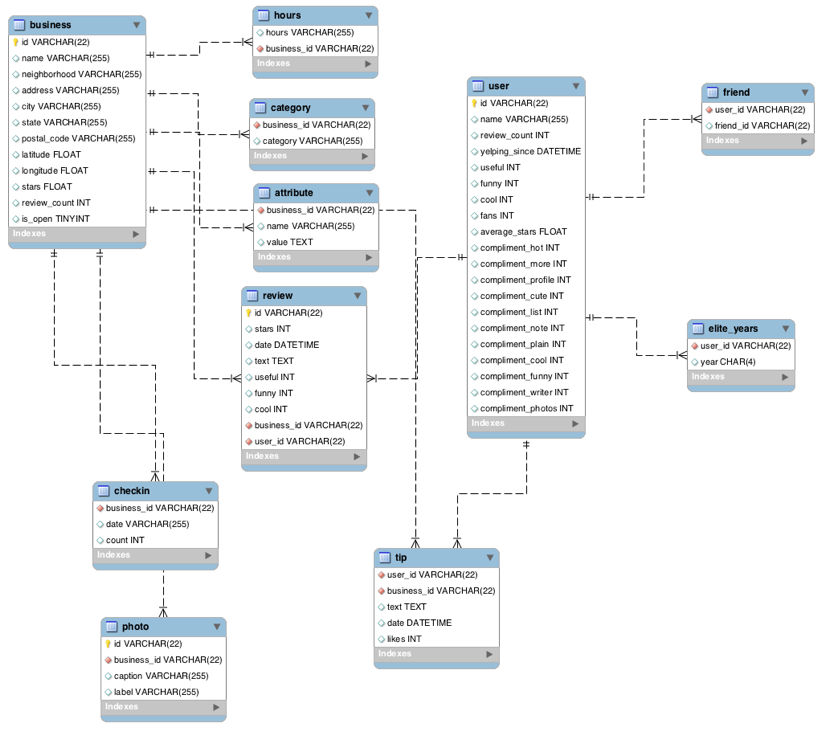

- This dataset is a subset of Yelp and has information about businesses
across 8 metropolitan areas in the USA and Canada.
- The original data is shared by Yelp as JSON files.
- The five JSON files are business, review, user, tip and checkin.
- The JSON files are stored in the database for easy retrieval of data.

In [3]:
# creating database connection
conn = sqlite3.connect('yelp.db')

In [4]:
# tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [5]:
# explore what type of data available in the tables
for table in tables['name']:
    print('-'*50,f'{table}','-'*50)
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))

-------------------------------------------------- business --------------------------------------------------


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


-------------------------------------------------- review --------------------------------------------------


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


-------------------------------------------------- user --------------------------------------------------


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


-------------------------------------------------- tip --------------------------------------------------


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


-------------------------------------------------- checkin --------------------------------------------------


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


# Data Analysis

In [6]:
# total business count
pd.read_sql_query("select count(*) from business ",conn)

,count(*)
0,150346


In [7]:
# restaurants business that are open
business_id = pd.read_sql_query("select business_id, review_count from business WHERE LOWER(categories) LIKE '%restaurant%' and is_open = 1",conn)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


* Out of 150k businesses, 35k are restaurants business and are open.

In [8]:
# What is the descriptive stats for review count and star rating for businesses?
pd.read_sql_query(f"""SELECT
  AVG(review_count) AS average_review_count,
  MIN(review_count) AS min_review_count,
  MAX(review_count) AS max_review_count,
  (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
 
  AVG(stars) AS average_star_rating,
  MIN(stars) AS min_star_rating,
  MAX(stars) AS max_star_rating,
  (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};

""",conn).transpose()

,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


* Analyzing the median and maximum review count revealed a significant number of restaurants with much higher review counts compared to others. This could skew further analysis.
* To address this, we decided to remove restaurants with outlier review counts.
* We will implement to identify and remove outliers using the Interquartile Range (IQR) method. 

In [9]:
# function for removing outliers using interquartile range
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)  
    q3 = df[col].quantile(0.75)  
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr  
    upper_bound = q3 + 1.5 * iqr  
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  
    return df

business_id = remove_outliers(business_id,'review_count')

In [10]:
# check for the outliers removed
pd.read_sql_query(f"""SELECT
  AVG(review_count) AS average_review_count,
  MIN(review_count) AS min_review_count,
  MAX(review_count) AS max_review_count,
  (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
 
  AVG(stars) AS average_star_rating,
  MIN(stars) AS min_star_rating,
  MAX(stars) AS max_star_rating,
  (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};

""",conn).transpose()

,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


After removing outliers, now we are getting average review count as 55 for the restaurants business.

In [11]:
# Which restaurants have the highest number of reviews?
pd.read_sql_query(f"""SELECT name, SUM(review_count) as review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count DESC
LIMIT 10;""",conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [12]:
# Which restaurants have the highest raing?
pd.read_sql_query(f"""SELECT name, SUM(review_count) as review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC
LIMIT 10;
""",conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


* No Direct Correlation: Higher ratings do not guarantee a higher review count, and vice versa.
* Review count reflects user engagement but not necessarily overall customer satisfaction or business performance.
* Success in the restaurant business is not solely determined by ratings or review counts.


,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


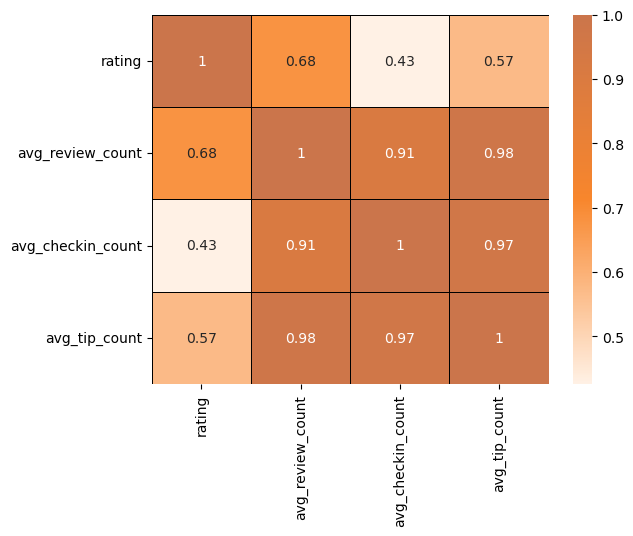

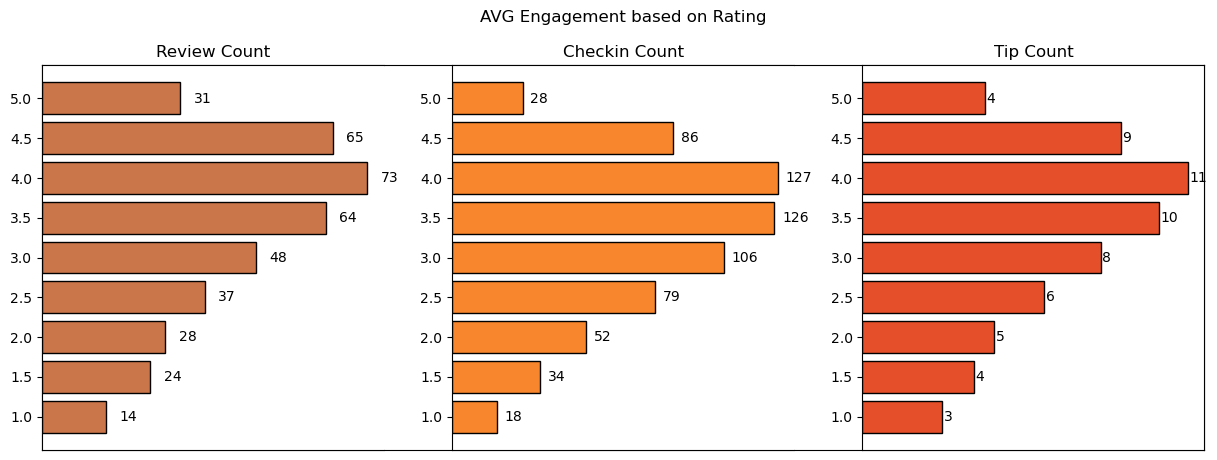

In [13]:
# Do restaurants with higher engagement tend to have higher ratings?
review_count_df = pd.read_sql_query(f"""SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count,
AVG(total.checkin_count) as avg_checkin_count,
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id) as total

GROUP BY total.avg_rating
    
""",conn)
display(review_count_df)

colors = ['#FFF1E5',"#F8862C", "#CB754B"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(review_count_df.corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor = 'black')

plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k',color='#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color='black', va='center')
plt.xticks([])
plt.show()

* Data shows a general increase in average review, check-in, and tip counts as ratings improve from 1 to 4 stars.
* Restaurants rated 4 stars exhibit the highest engagement across reviews, check-ins, and tips, suggesting a peak in user interaction.
* Interestingly, engagement metrics (reviews, check-ins, tips) dip for restaurants rated 4.5 and significantly more at 5 stars.
* The drop in engagement at 5.0 stars might suggest either a saturation point where fewer customers feel compelled to add their reviews, or a selectivity where only a small, satisfied audience frequents these establishments.

,business_id,review_count,avg_rating,checkin_count,tip_count,rating_category
14,30OhTA38fp8xuqW4O2D6Eg,248,4.0,296.0,14.0,High-Rated
15,Aw9Tldxcg5ifodzn0R2O6g,248,4.0,252.0,18.0,High-Rated
16,9iSoPNBV54dj6L0rxO4RWw,248,3.5,219.0,7.0,High-Rated
17,HI1zbZuujFH9yPBKP1GH6g,248,4.5,214.0,21.0,High-Rated
18,7dbUShu3yTUVNhTrdnF0FQ,248,4.0,166.0,16.0,High-Rated
...,...,...,...,...,...,...
31389,v2xhzKIW-1bySJw5UPy8Jw,5,2.5,1.0,1.0,Low-Rated
31392,wp_fwjX8JJC85F-sgb7ASg,5,5.0,1.0,1.0,High-Rated
31393,x3eNFvMD1LaqpBnJSD6A9Q,5,3.0,1.0,1.0,Low-Rated
31397,yeJAs2OrnRRhsbywHPGMeQ,5,5.0,1.0,3.0,High-Rated


<Axes: >

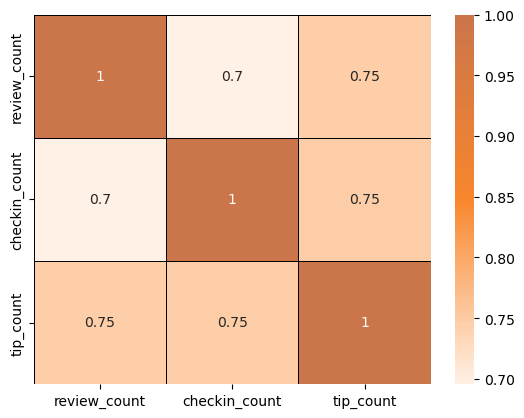

In [14]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df = pd.read_sql_query(f"""SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END)  as rating_category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
ORDER BY
    review_count DESC,
    checkin_count DESC; 
""",conn).dropna()

engagement_df = remove_outliers(engagement_df,'checkin_count')
display(engagement_df)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor = 'black')


In [15]:
# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?
engagement_df.groupby('rating_category')[['review_count', 'checkin_count', 'tip_count']].mean()

,review_count,checkin_count,tip_count
rating_category,,,
High-Rated,63.099378,80.71859,8.069794
Low-Rated,37.152862,64.84321,5.456341


* The dataset shows a strong positive correlation among review counts, check-in counts, and tip counts.
* These correlations suggest that user engagement across different platforms (reviews, tips, and check-ins) is interlinked; higher activity in one area tends to be associated with higher activity in others.
* Businesses should focus on strategies that boost all types of user engagement, as increases in one type of engagement are likely to drive increases in others, enhancing overall visibility and interaction with customers.


In [16]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [17]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?

city_df = pd.read_sql_query(f"""SELECT state,city, latitude, longitude, AVG(stars) AS avg_rating, SUM(review_count) as review_count,
COUNT(*) as restaurant_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY state, city
ORDER BY review_count DESC 
limit 10;""",conn)


city_df['success_score'] = calculate_success_metric(city_df)
display(city_df)
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                     vmin=city_df['success_score'].min(),
                                     vmax=city_df['success_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)



,state,city,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,PA,Philadelphia,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,FL,Tampa,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,IN,Indianapolis,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,AZ,Tucson,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,TN,Nashville,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,LA,New Orleans,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,MO,Saint Louis,38.583223,-90.407187,3.414303,51490,811,37.042331
7,NV,Reno,39.476518,-119.784037,3.479626,48393,589,37.535187
8,AB,Edmonton,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,ID,Boise,43.611192,-116.206275,3.558824,36104,561,37.346958


* Philadelphia emerges as the top city with the highest success score, indicating a combination of high ratings and active user engagement.
* Following Philadelphia, Tampa, Indianapolis, and Tucson rank among the top cities with significant success scores, suggesting thriving restaurant scenes in these areas.
* The success metrics vary significantly across different states and cities, highlighting regional differences in dining preferences, culinary scenes, and customer engagement levels.
* Identifying cities with high success scores presents opportunities for restaurant chains to expand or invest further, while areas with lower scores may require targeted efforts to improve ratings and increase user engagement.

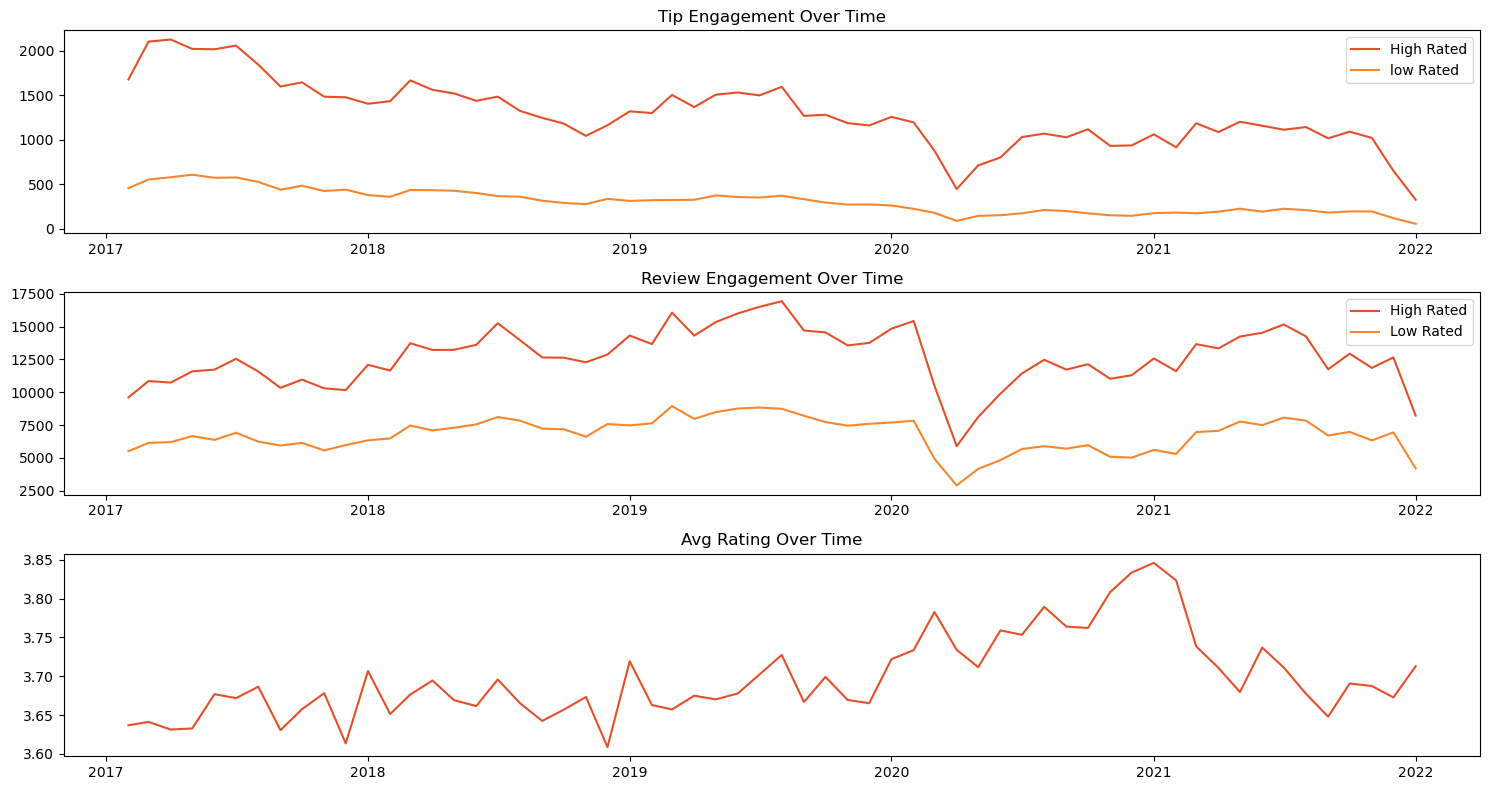

In [18]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
#  Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN 
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""",conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN 
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""",conn)

time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""",conn)
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['tip_count'], label = 'low Rated',color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['review_count'],  label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'],time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [19]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

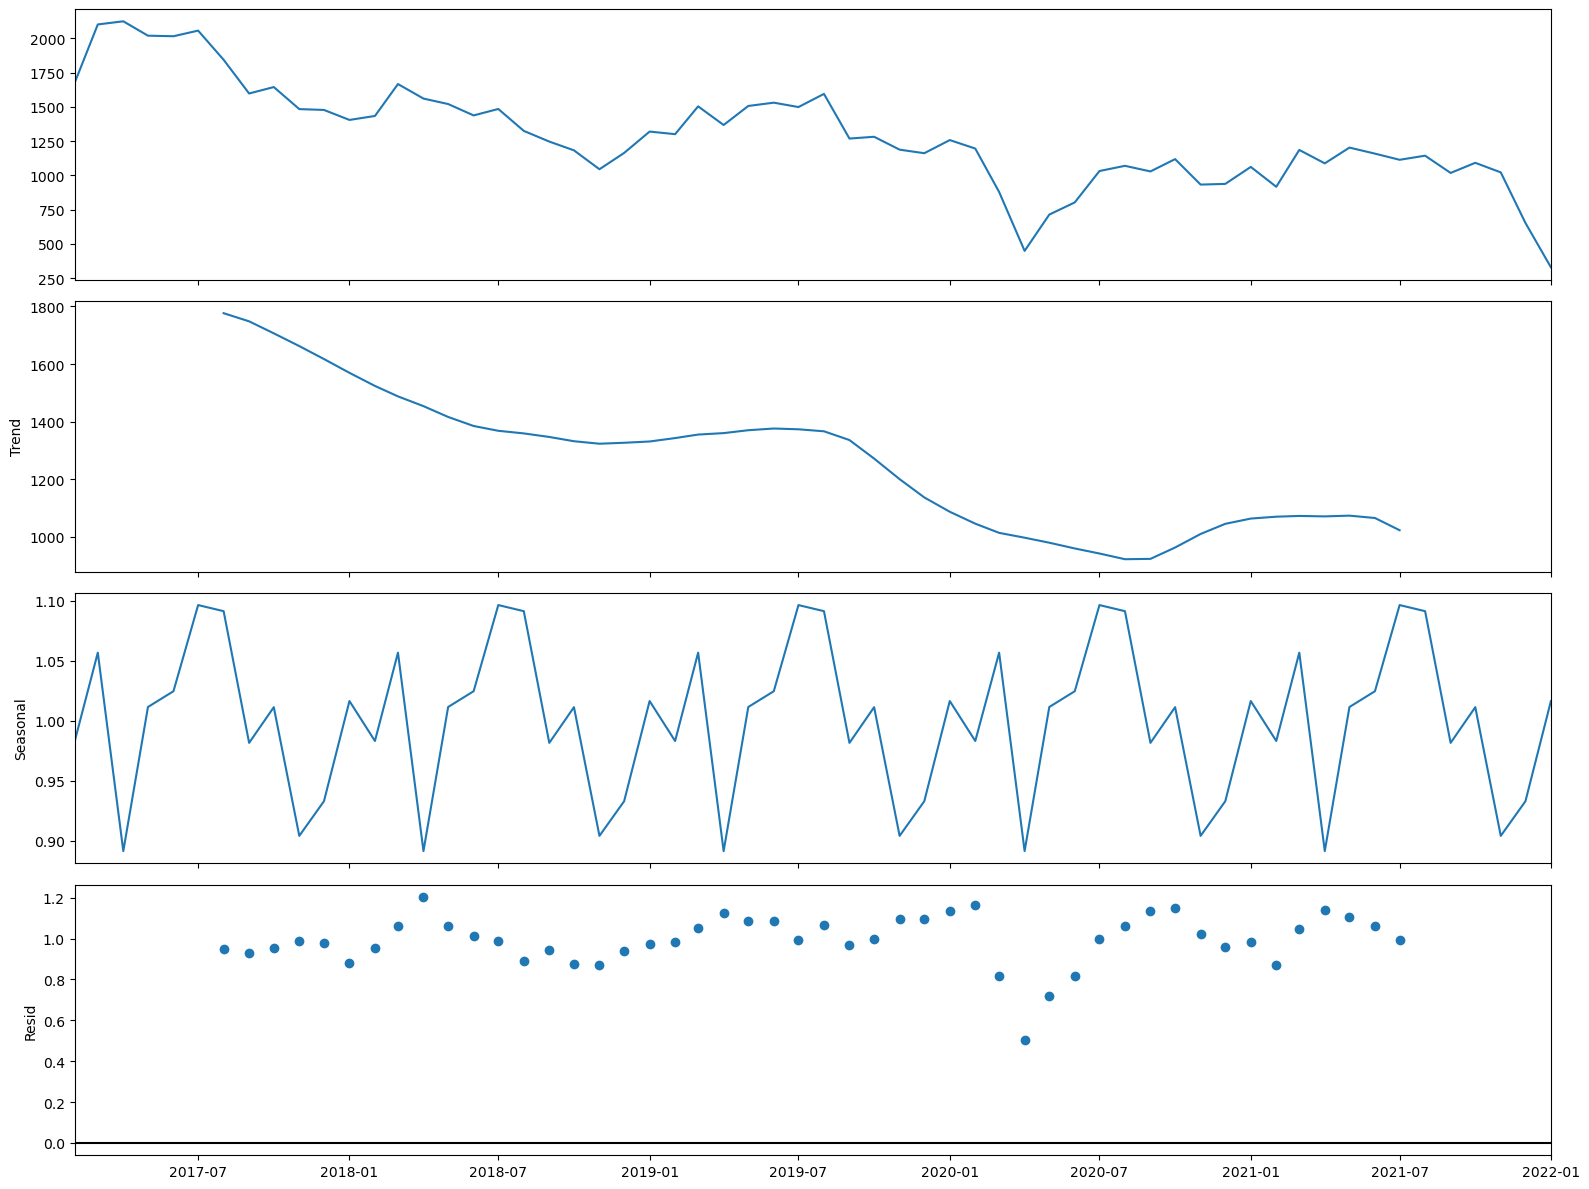

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, 
                                                  model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

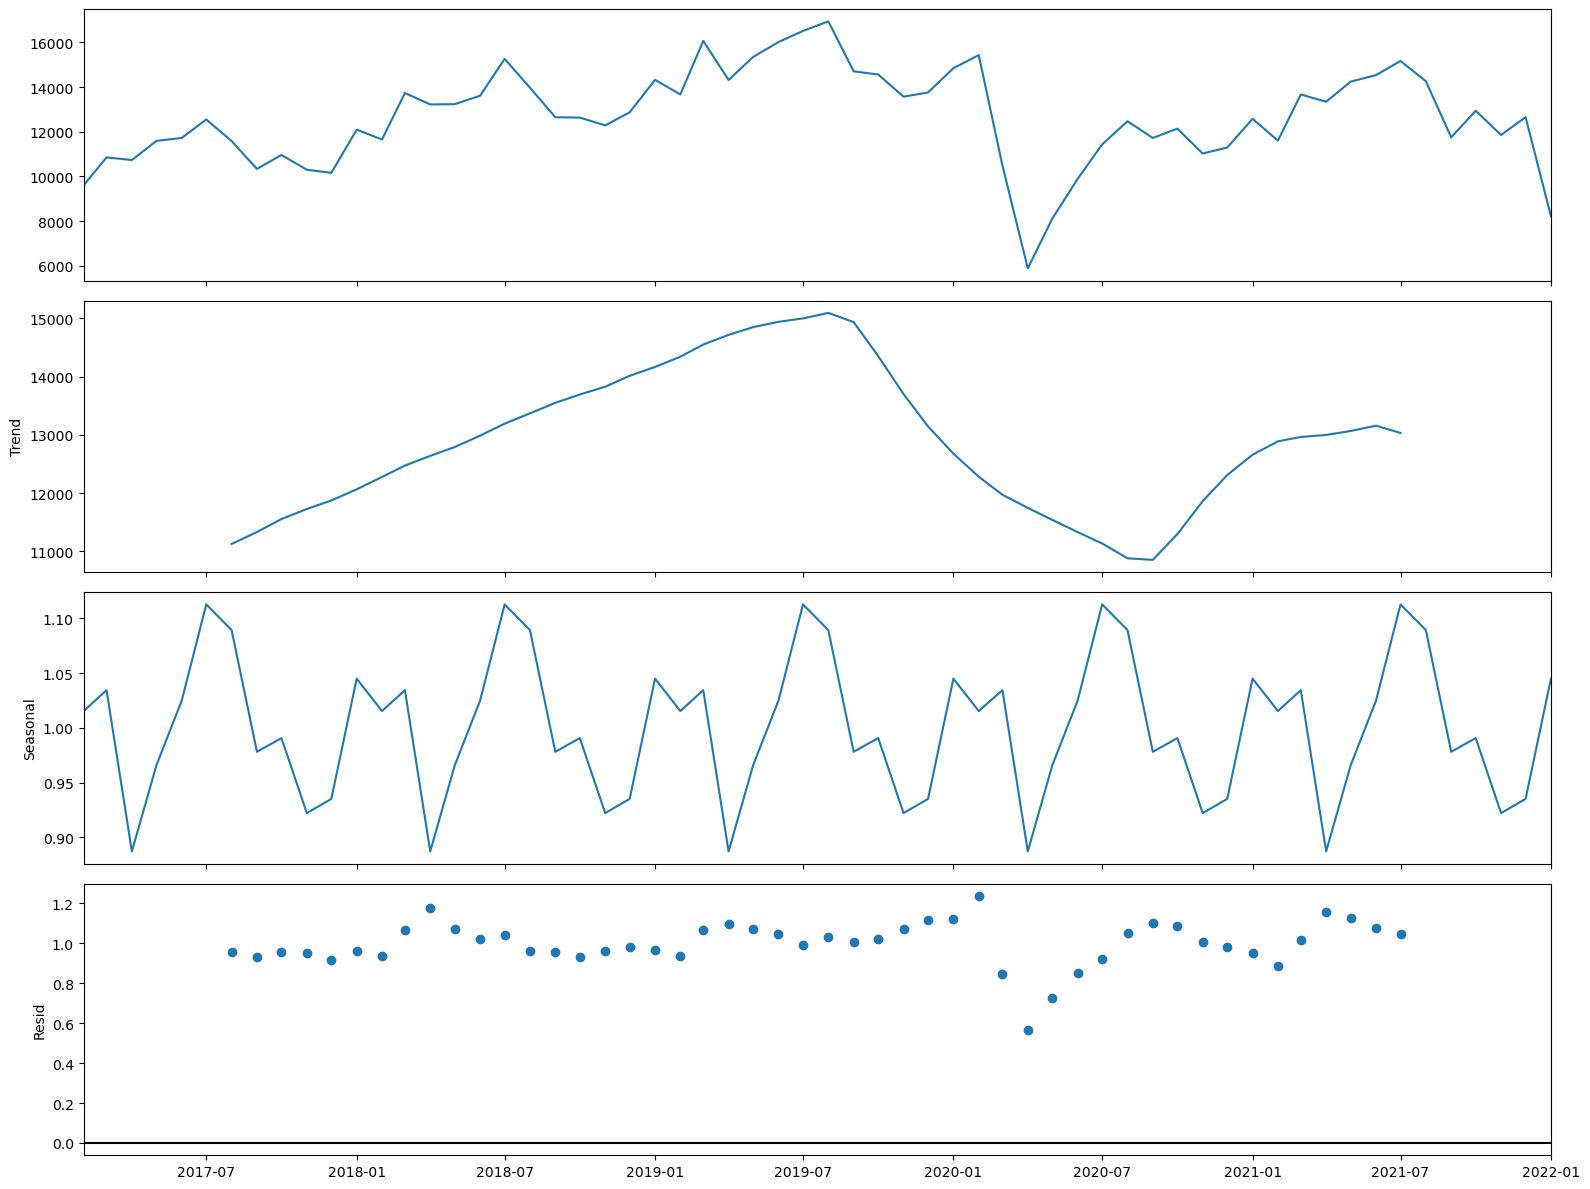

In [21]:
multiplicative_decomposition = seasonal_decompose(review_high_rated, 
                                                  model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

* Successful businesses, particularly those with higher ratings (above 3.5), exhibit consistent and possibly increasing user engagement over time.
* High rated restaurants maintain a steady or growing level of user engagement over time, reflecting ongoing customer interest and satisfaction.
* Tip count is showing a downward trend whereas review count is showing an upward trend with time.
* Year starting and year ending from around November and March is highly engaging and seasonal.

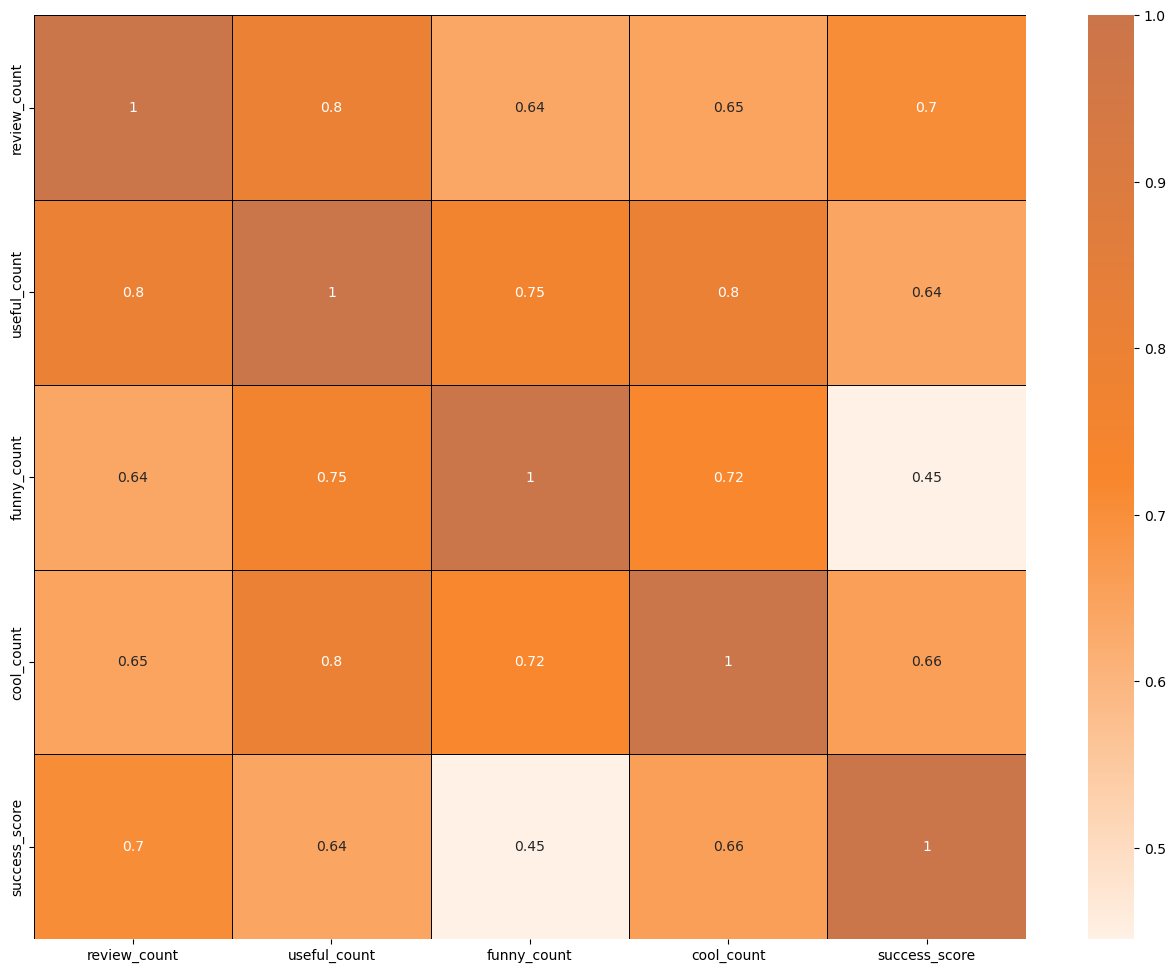

In [22]:
#  How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count, 
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
    SUM(useful) as useful_count,
    SUM(funny) as funny_count,
    SUM(cool) as cool_count
FROM
    review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id 
ORDER BY review_count""",conn)

sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor = 'black')

plt.show()

* “useful,
" "funny,
" and "cool" are attributes
associated with user reviews. They represent the
feedback provided by users about the
usefulness, humor, or coolness of a particular
review.
* Higher counts of useful, funny, and cool reviews
suggest greater user engagement and
satisfaction, which are key factors contributing
to a restaurant's success.

In [23]:
# Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query("""SELECT
    elite,
    COUNT(*) AS row_count,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
""",conn)
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


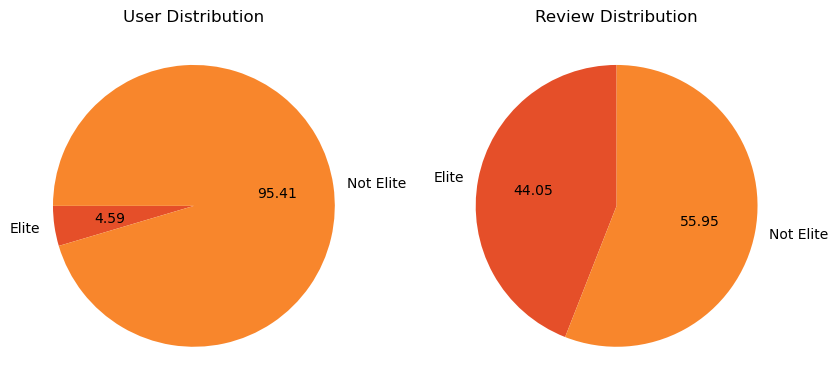

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels = elite_df['elite'], autopct='%.2f', startangle = 180, colors = ['#E54F29','#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle = 90, colors = ['#E54F29','#F8862C'])
plt.show()

* Elite users are individuals who have been recognized and awarded the "Elite" status by Yelp for their active and high-quality contributions to the platform, such as frequent and detailed reviews, photos, and check-ins, among other criteria.
* Elite users, despite being significantly fewer in number, contribute a substantial proportion of the total review count compared to non-elite users.
* Elite users often provide detailed and insightful reviews, which can influence other users' perceptions and decisions regarding a business.
* Reviews from elite users may receive more attention and visibility on the Yelp platform due to their status, potentially leading to higher exposure for businesses.
* Establishing a positive relationship with elite users can lead to repeat visits and loyalty, as they are more likely to continue supporting businesses they have had good experiences with.

In [25]:
# What are the busiest hours for restaurants?
review_engagement = pd.read_sql_query("""SELECT
  cast (strftime('%H',date) as integer)
  as hour,
  COUNT(*) AS review_count
FROM
  review
GROUP BY
  hour;
""",conn)

tip_engagement = pd.read_sql_query("""SELECT
  cast (strftime('%H',date) as integer)
  as hour,
  COUNT(*) AS tip_count
FROM
  tip
GROUP BY
  hour;
""",conn)

checkin =  pd.read_sql_query("""SELECT date FROM checkin""",conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

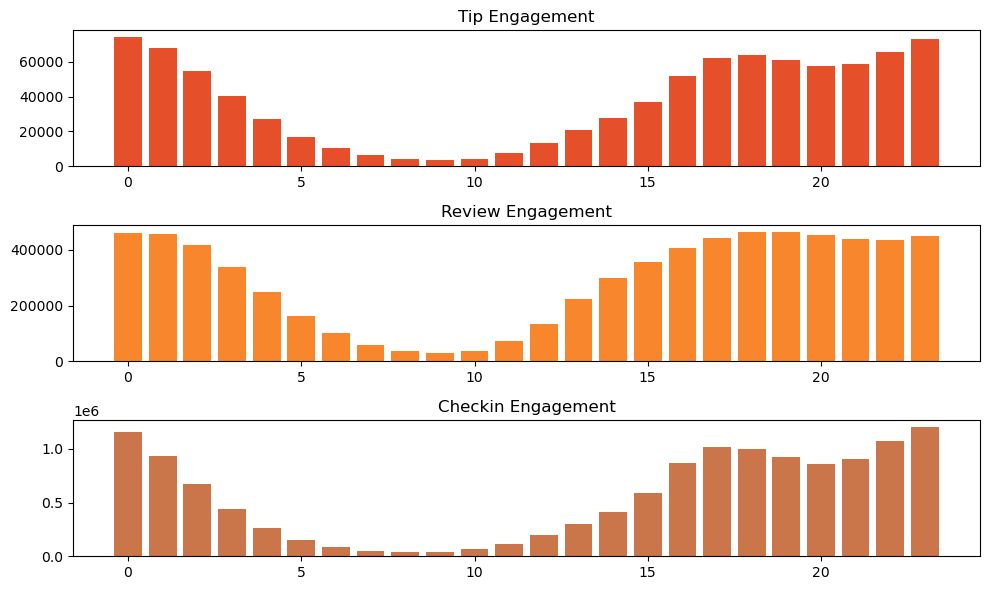

In [27]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'], color = '#E54F29')
plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'],review_engagement['review_count'], color = '#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index,checkin_engagement[0], color = '#CB754B')
plt.tight_layout()
plt.show()

* The busiest hours for restaurants, based
on user engagement, span from 4 pm to 1
am.
* Knowing the peak hours allows businesses
to optimize their staffing levels and
resource allocation during these times to
ensure efficient operations and quality
service delivery.
* The concentration of user engagement during the evening and night hours suggests a higher
demand for dining out during these times, potentially driven by factors such as work schedules,
social gatherings, and leisure activities.


# Recommendations
* Utilizing insights from the analysis of various metrics such as user engagement, sentiment of reviews, peak hours, and the impact of elite users, businesses can make informed decisions to drive success.
* Understanding customer preferences, behavior, and satisfaction levels is paramount. Businesses should focus on delivering exceptional experiences to meet customer expectations.
* By leveraging data on peak hours and user engagement, businesses can optimize staffing levels, resource allocation, and operating hours to ensure efficiency and quality service delivery during high-demand periods.
* Positive reviews from elite users and high user engagement can boost a business's online visibility and reputation. Maintaining active engagement with customers and responding promptly to feedback is crucial for building credibility and attracting new customers.
* Collaborating with elite users and leveraging their influence can amplify promotional efforts, increase brand awareness, and drive customer acquisition. Building strong relationships with key stakeholders, including loyal customers, can further strengthen a business's position in the market.
* Businesses can adjust their operating hours or introduce special promotions to capitalize on the
increased demand during peak hours.
* Less successful businesses may need to focus on strategies to enhance user engagement over time,
such as improving service quality, responding to customer feedback.
* Cities with high success scores presents opportunities for restaurant chains to expand or invest
further.